In [1]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, UpSampling2D, Input, Lambda, Conv2DTranspose, concatenate
from classification_models.tfkeras import Classifiers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

import numpy as np
import time
import cv2

/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
def millis():
    return int(time.time() * 1000)

In [3]:
def make_fcn_model(IMG_HEIGHT, IMG_WIDTH):
    b = 2
    i = Input((IMG_HEIGHT, IMG_WIDTH, 3))
    # s = Lambda(lambda x: preprocess_input(x)) (i)
    c1 = Conv2D(2**b, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (i)
    c1 = Conv2D(2**b, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
    c1 = Conv2D(2**b, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPool2D((2, 2)) (c1)

    c2 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPool2D((2, 2)) (c2)

    c3 = Conv2D(2**(b+2), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Conv2D(2**(b+2), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(2**(b+2), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)

    p3 = MaxPool2D((2, 2)) (c3)

    c4 = Conv2D(2**(b+3), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Conv2D(2**(b+3), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(2**(b+3), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)

    p4 = MaxPool2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(2**(b+4), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Conv2D(2**(b+4), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(2**(b+4), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)
    c5 = Conv2D(2**(b+4), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(2**(b+3), (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(2**(b+3), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(2**(b+3), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Conv2D(2**(b+3), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(2**(b+2), (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(2**(b+2), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Conv2D(2**(b+2), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(2**(b+2), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(2**(b+1), (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

    # u9 = Conv2DTranspose(2**b, (2, 2), strides=(2, 2), padding='same') (c8)
    # u9 = concatenate([u9, c1], axis=3)
    # c9 = Conv2D(2**b, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
    # c8 = Conv2D(2**(b+1), (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
    # c9 = Conv2D(2**b, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)

    o = Conv2D(1, (1, 1), activation='sigmoid') (c8)

    model = Model(inputs=i, outputs=o)
    return model

In [4]:
test_model = make_fcn_model(144, 400)
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 144, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 144, 400, 4)  112         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 144, 400, 4)  148         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 144, 400, 4)  148         conv2d_1[0][0]                   
______________________________________________________________________________________________

In [6]:
test_model.load_weights('./checkpoints/fcn_big_01.h5')

In [7]:
test_folder = './training_images/val/'

In [8]:
test_imgs = [test_folder + f for f in os.listdir(test_folder)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


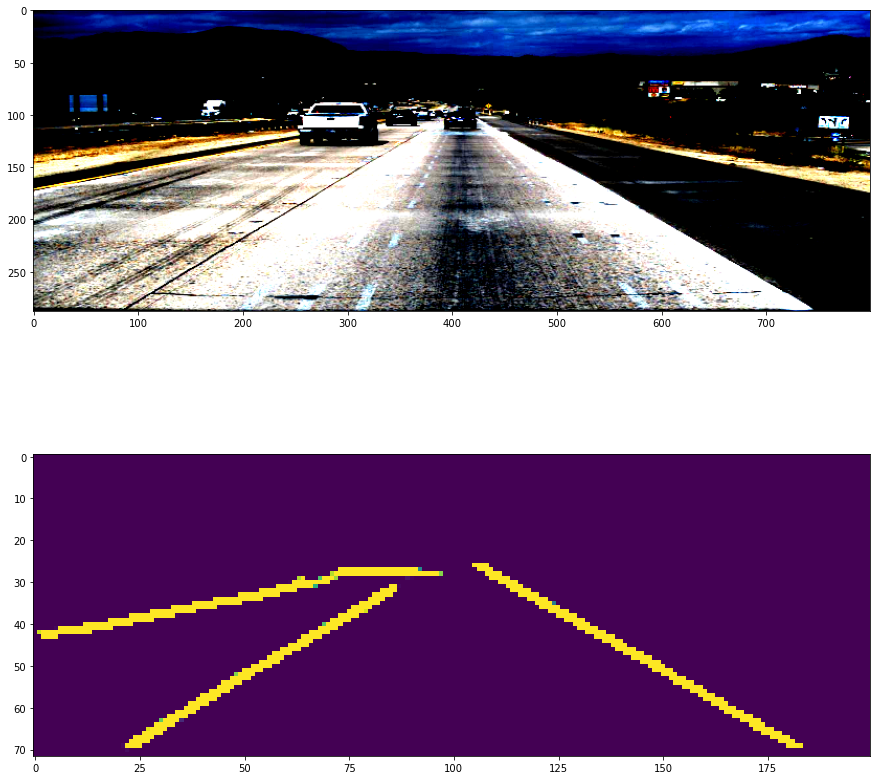

In [23]:
image = np.load(np.random.choice(test_imgs))['image'][:, :, :3]
pred = test_model.predict(np.expand_dims(cv2.resize(image, (400, 144)), 0))
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.subplot(2, 1, 2)
plt.imshow(pred[0])

In [32]:
start_mil = millis()
predict_count = 100
image = np.random.random((1, 144, 400, 3))
for i in range(predict_count):
    pred = test_model.predict(image)
stop_mil = millis()
print('Prediction took {} millis'.format((stop_mil - start_mil)//predict_count))

Prediction took 25 millis


In [1]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense, Flatten
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model, Sequential

def prepare_model(input_shape = (144, 400, 3)):
    base_model = MobileNet(include_top=False, weights=None, input_shape=input_shape, alpha=0.7, depth_multiplier=1)
    
    outp = base_model.output
    flat = Flatten()(outp)
    
    return Model(base_model.input, flat)

/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
test_model = prepare_model()
test_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 144, 400, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 145, 401, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 72, 200, 22)       594       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 72, 200, 22)       88        
_________________________________________________________________
conv1_relu (ReLU)            (None, 72, 200, 22)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 72, 200, 22)       198       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 72, 200, 22)       88    

In [5]:
mini_model = Sequential()
for idx, l in enumerate(test_model.layers):
    if idx <= 32:
        mini_model.add(l)
    else:
        break
mini_model.add(Conv2D(1, 1, (1, 1), padding='same', activation='sigmoid'))
mini_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 145, 401, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 72, 200, 22)       594       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 72, 200, 22)       88        
_________________________________________________________________
conv1_relu (ReLU)            (None, 72, 200, 22)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 72, 200, 22)       198       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 72, 200, 22)       88        
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 72, 200, 22)      

In [6]:
with open('./checkpoints/moblilenet_lane_01.json', 'w') as model_file:
    model_file.write(mini_model.to_json())

In [7]:
from tensorflow.keras.models import model_from_json

with open('./checkpoints/moblilenet_lane_01.json', 'r') as model_file:
    mini_model = model_from_json(model_file.read())

In [2]:
mini_model.load_weights('./checkpoints/moblienet_mini_01.h5')

In [41]:
mini_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 145, 401, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 72, 200, 22)       594       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 72, 200, 22)       88        
_________________________________________________________________
conv1_relu (ReLU)            (None, 72, 200, 22)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 72, 200, 22)       198       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 72, 200, 22)       88        
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 72, 200, 22)      